In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [2]:
cwd = Path.cwd()
source_data = Path(cwd)/"data"

# Exploratory Data Analysis

In [3]:
salaries = pd.read_csv(source_data/"salaries.csv")

In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [5]:
salaries = salaries[['work_year', 'experience_level', 'employment_type', 'job_title',
                      'employee_residence', 'remote_ratio', 'company_location', 'company_size',
                      'salary_in_usd']]
salaries

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,2024,MI,FT,Data Scientist,AU,0,AU,S,120000
1,2024,MI,FT,Data Scientist,AU,0,AU,S,70000
2,2024,MI,CT,Data Scientist,US,0,US,M,130000
3,2024,MI,CT,Data Scientist,US,0,US,M,110000
4,2024,MI,FT,Data Science Manager,US,0,US,M,240000
...,...,...,...,...,...,...,...,...,...
16489,2020,SE,FT,Data Scientist,US,100,US,L,412000
16490,2021,MI,FT,Principal Data Scientist,US,100,US,L,151000
16491,2020,EN,FT,Data Scientist,US,100,US,S,105000
16492,2020,EN,CT,Business Data Analyst,US,100,US,L,100000


In [6]:
cols = salaries.columns.values
for col in cols:
    print(salaries[col].unique())

[2024 2022 2023 2020 2021]
['MI' 'SE' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']
['Data Scientist' 'Data Science Manager' 'Business Intelligence Engineer'
 'Data Architect' 'Data Analyst' 'Business Intelligence' 'ML Engineer'
 'Data Modeler' 'Machine Learning Engineer' 'Data Integration Specialist'
 'Research Scientist' 'Data Engineer' 'Data Product Manager'
 'Data Manager' 'Data Visualization Specialist' 'Data Science'
 'Data Specialist' 'Business Intelligence Lead' 'Research Analyst'
 'Business Intelligence Analyst' 'AI Engineer' 'AI Software Engineer'
 'Machine Learning Scientist' 'Data Science Engineer' 'Applied Scientist'
 'Machine Learning Operations Engineer' 'Analytics Engineer'
 'Data Management Analyst' 'Encounter Data Management Professional'
 'Data Analytics Specialist' 'Head of Data' 'Data Analytics Lead'
 'Research Engineer' 'AI Scientist' 'Business Intelligence Developer'
 'Machine Learning Developer' 'Data Management Specialist'
 'Data Infrastructure Engineer' 'BI Developer' 'Adm

<Axes: >

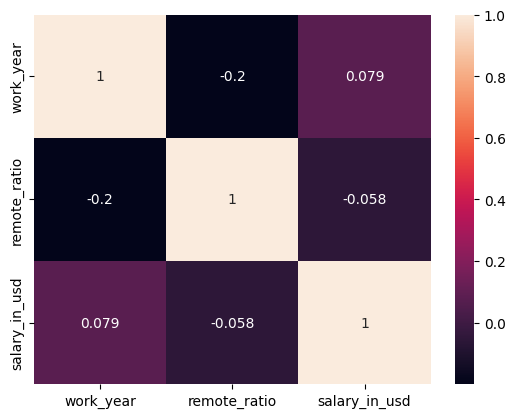

In [7]:
numeric_sal = salaries[['work_year', 'remote_ratio', 'salary_in_usd']]
sns.heatmap(numeric_sal.corr(), annot=True)

In [13]:
salaries2 = salaries.copy()
salaries2['work_year'] = salaries2['work_year'].astype(str)
salaries2['remote_ratio'] = salaries2['remote_ratio'].astype(str)

In [26]:
def job_type_label(title):
    if 'Robotics' in title:
        return 'Robotics'
    elif 'Machine Learning' in title:
        return 'Machine Learning'
    elif "ML" in title:
        return 'Machine Learning'
    elif 'AI' in title:
        return 'AI'
    elif 'Deep Learning' in title:
        return 'AI'
    elif 'NLP' in title:
        return 'AI'
    elif 'Data' in title:
        return 'Data'
    elif 'Insight' in title:
        return 'Data'
    elif 'Analytics' in title:
        return 'Data'
    elif 'Business Intelligence' in title:
        return 'Business Intelligence'
    elif 'BI' in title:
        return 'Business Intelligence'
    else:
        return "Others"

In [27]:
salaries2['job_type'] = salaries2['job_title'].apply(job_type_label)
salaries2['job_type'].unique()

array(['Data', 'Business Intelligence', 'Machine Learning', 'Others',
       'AI', 'Robotics'], dtype=object)

In [29]:
country_codes = list(set(salaries['employee_residence'].tolist() + salaries['company_location'].tolist()))
len(country_codes)

90

In [30]:
country_to_continent = {
    'ES': 'Europe', 'SI': 'Europe', 'IQ': 'Asia', 'IL': 'Asia', 'HK': 'Asia',
    'NG': 'Africa', 'LV': 'Europe', 'AS': 'North America', 'BO': 'South America',
    'AE': 'Asia', 'GH': 'Africa', 'QA': 'Asia', 'AU': 'Oceania', 'SE': 'Europe',
    'RS': 'Europe', 'JP': 'Asia', 'DK': 'Europe', 'IT': 'Europe', 'PR': 'North America',
    'AM': 'Asia', 'TH': 'Asia', 'NL': 'Europe', 'PE': 'South America', 'BG': 'Europe',
    'HN': 'North America', 'NO': 'Europe', 'MX': 'North America', 'KW': 'Asia',
    'VN': 'Asia', 'SA': 'Asia', 'GI': 'Europe', 'PK': 'Asia', 'BR': 'South America',
    'AD': 'Europe', 'BA': 'Europe', 'UG': 'Africa', 'LB': 'Asia', 'LU': 'Europe',
    'GR': 'Europe', 'BS': 'North America', 'EC': 'South America', 'IN': 'Asia',
    'CN': 'Asia', 'CL': 'South America', 'DZ': 'Africa', 'RU': 'Europe', 'HU': 'Europe',
    'FR': 'Europe', 'UZ': 'Asia', 'EE': 'Europe', 'IR': 'Asia', 'AT': 'Europe',
    'ID': 'Asia', 'AR': 'South America', 'SG': 'Asia', 'DO': 'North America',
    'GB': 'Europe', 'CR': 'North America', 'UA': 'Europe', 'PH': 'Asia', 'BE': 'Europe',
    'LT': 'Europe', 'NZ': 'Oceania', 'EG': 'Africa', 'CA': 'North America', 'IE': 'Europe',
    'OM': 'Asia', 'MY': 'Asia', 'KR': 'Asia', 'KE': 'Africa', 'TR': 'Asia',
    'GE': 'Asia', 'DE': 'Europe', 'CY': 'Europe', 'ZA': 'Africa', 'CH': 'Europe',
    'MT': 'Europe', 'MD': 'Europe', 'MU': 'Africa', 'US': 'North America',
    'HR': 'Europe', 'FI': 'Europe', 'CF': 'Africa', 'RO': 'Europe', 'CO': 'South America',
    'TN': 'Africa', 'JE': 'Europe', 'PL': 'Europe', 'CZ': 'Europe', 'PT': 'Europe'
}
salaries2['employee_continent'] = salaries2['employee_residence'].map(country_to_continent)
salaries2['company_continent'] = salaries2['company_location'].map(country_to_continent)

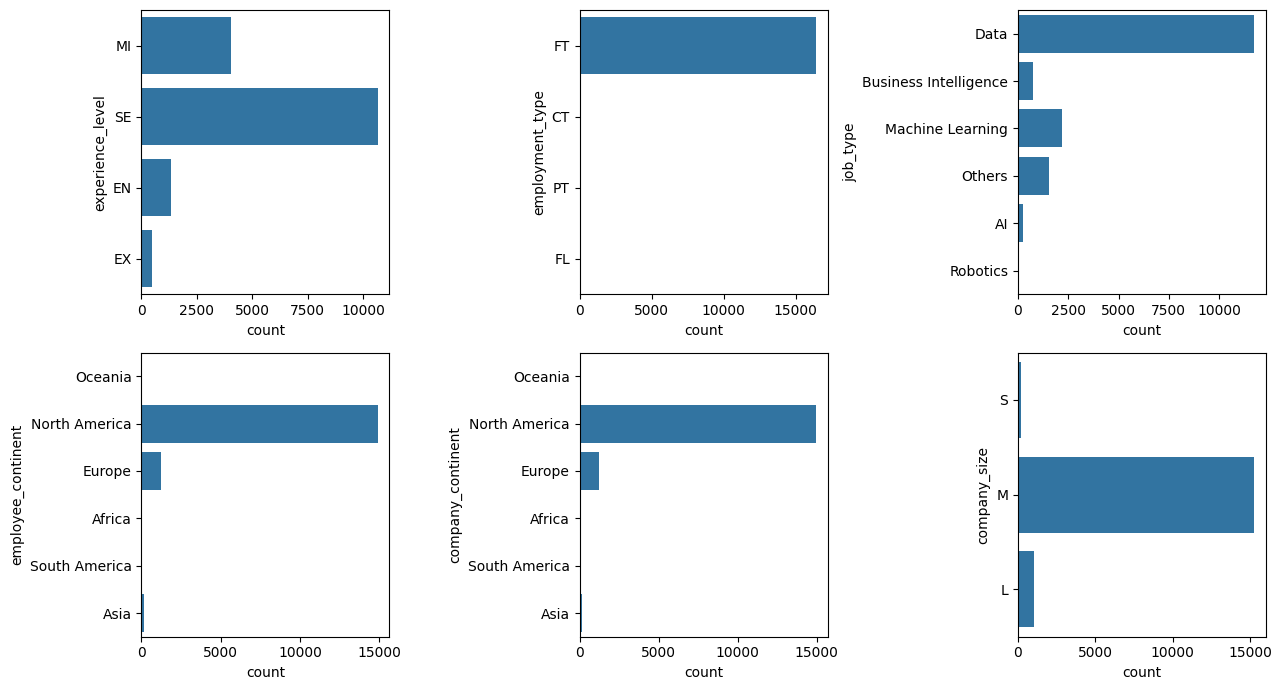

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(13,7))
sns.countplot(salaries2['experience_level'], ax=axes[0,0])
sns.countplot(salaries2['employment_type'], ax=axes[0,1])
sns.countplot(salaries2['job_type'], ax=axes[0,2])
sns.countplot(salaries2['employee_continent'], ax=axes[1,0])
sns.countplot(salaries2['company_continent'], ax=axes[1,1])
sns.countplot(salaries2['company_size'], ax=axes[1,2])
plt.tight_layout()